After loading the data, I initially dropped rows with NaN values. However, with 92 rows (23%) being removed, this approach risked losing too much data. Instead, I addressed the issue by using imputation to fill in the missing values.

I selected the following methods for imputation:
- **Clinical Features**: Used the **Median** for numerical data and **Mode** for categorical data.
- **MRI-Based Features**: Applied **KNN Imputation**.

Subsequently, I checked for outliers and removed them, which resulted in **335 rows being removed**. Given the significant data loss, I decided to revise the approach by selecting features before addressing outliers.

In [94]:
import pandas as pd
import numpy as np

# File path
file_path = r"C:\Users\HP\Desktop\TrainDataset2024.xlsx"

# Read file
data = pd.read_excel(file_path)

# Display the first 5 rows 
print(data.head())

# Replace all occurrences of 999 with NaN
data.replace(999, np.nan, inplace=True)
data.info()
len(data)



          ID  pCR (outcome)  RelapseFreeSurvival (outcome)   Age  ER  PgR  \
0  TRG002174              1                          144.0  41.0   0    0   
1  TRG002178              0                          142.0  39.0   1    1   
2  TRG002204              1                          135.0  31.0   0    0   
3  TRG002206              0                           12.0  35.0   0    0   
4  TRG002210              0                          109.0  61.0   1    0   

   HER2  TrippleNegative  ChemoGrade  Proliferation  ...  \
0     0                1           3              3  ...   
1     0                0           3              3  ...   
2     0                1           2              1  ...   
3     0                1           3              3  ...   
4     0                0           2              1  ...   

   original_glszm_SmallAreaHighGrayLevelEmphasis  \
0                                       0.517172   
1                                       0.444391   
2                   

400

In [95]:
# the target column is 'pCR (outcome)'
target = 'pCR (outcome)'

# Calculate the correlation of all features with the target column
correlation_with_target = data.corr()[[target]].sort_values(by=target, ascending=False)
print(correlation_with_target)


                                                 pCR (outcome)
pCR (outcome)                                         1.000000
Gene                                                  0.424465
HER2                                                  0.215970
original_glrlm_RunPercentage                          0.173460
original_glrlm_RunLengthNonUniformityNormalized       0.146893
...                                                        ...
LNStatus                                             -0.148915
original_firstorder_10Percentile                     -0.150102
original_gldm_LargeDependenceEmphasis                -0.171586
PgR                                                  -0.199050
ER                                                   -0.200782

[120 rows x 1 columns]


C:\Users\HP\AppData\Local\Temp\ipykernel_22096\3260070032.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_target = data.corr()[[target]].sort_values(by=target, ascending=False)


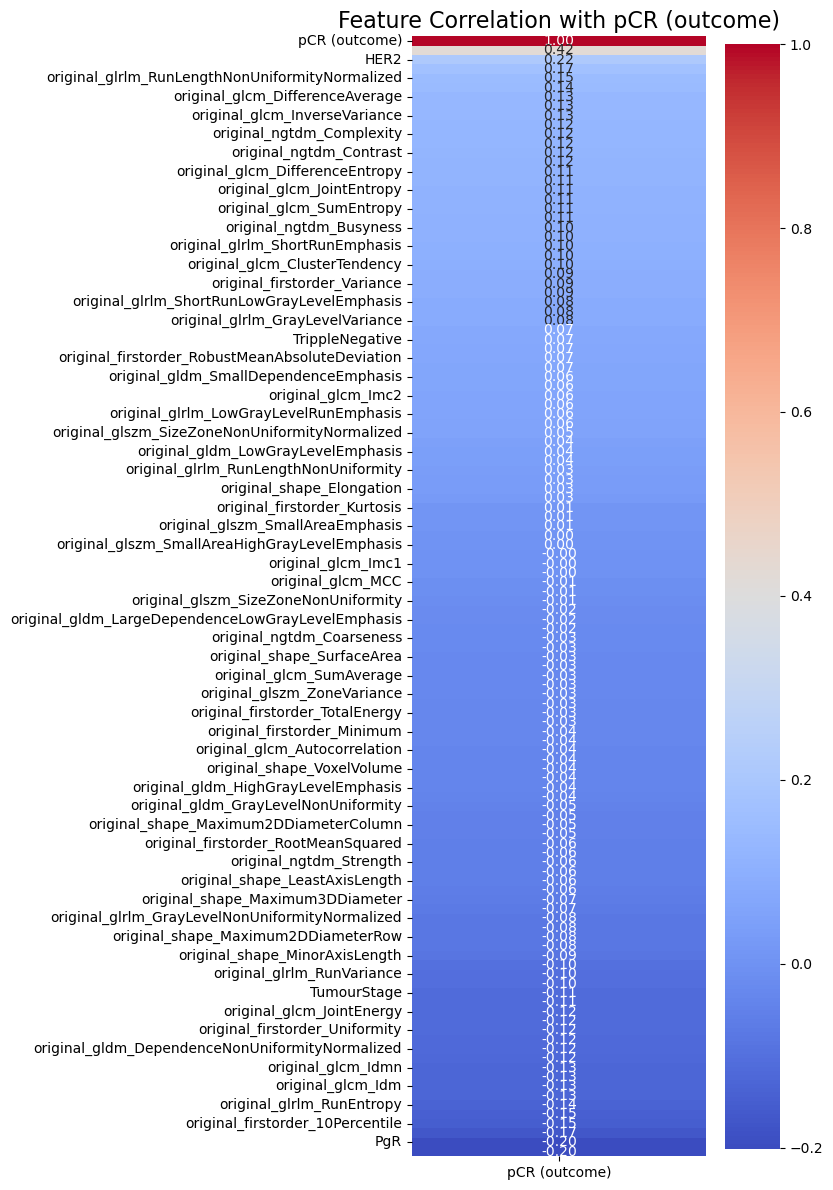

In [96]:
# Create a heatmap to visualize correlation specifically with the target

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

plt.figure(figsize=(8, 12))
sns.heatmap(correlation_with_target, annot=True, cmap='coolwarm', fmt=".2f")
plt.title(f"Feature Correlation with {target}", fontsize=16)
plt.tight_layout()
plt.show()


In [97]:
import pandas as pd

# Calculate correlation with the target variable
target = 'pCR (outcome)'
correlation_with_target = data.corr()[[target]].sort_values(by=target, ascending=False)

# Count the number of NaN values
na_counts = data.isnull().sum()

# Combine correlation and NaN count
feature_stats = pd.DataFrame({
    'Correlation': correlation_with_target[target],
    'NaN_Count': na_counts
})

# Filter features with correlation in the range 0.13 to 0.5 (positive) and -0.2 to -0.13 (negative)
selected_positive_features = feature_stats[(feature_stats['Correlation'] >= 0.13) & (feature_stats['Correlation'] <= 0.5)]
selected_negative_features = feature_stats[(feature_stats['Correlation'] >= -0.2) & (feature_stats['Correlation'] <= -0.13)]

# Combine selected positive and negative features
selected_features = pd.concat([selected_positive_features, selected_negative_features])
print(selected_features)


                                                 Correlation  NaN_Count
Gene                                                0.424465         88
HER2                                                0.215970          1
original_gldm_DependenceEntropy                     0.142371          0
original_glrlm_RunLengthNonUniformityNormalized     0.146893          0
original_glrlm_RunPercentage                        0.173460          0
LNStatus                                           -0.148915          1
PgR                                                -0.199050          1
original_firstorder_10Percentile                   -0.150102          0
original_gldm_LargeDependenceEmphasis              -0.171586          0
original_glrlm_RunEntropy                          -0.137242          0


C:\Users\HP\AppData\Local\Temp\ipykernel_22096\1855139171.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_target = data.corr()[[target]].sort_values(by=target, ascending=False)


In [98]:
# Check for missing values
missing_values = data['pCR (outcome)'].isnull().sum()

# Display the result
print(f"Missing values in 'pCR (outcome)': {missing_values}")


Missing values in 'pCR (outcome)': 5


In [99]:
# Apply KNN Imputer with different k values
from sklearn.impute import KNNImputer
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

selected_feature_names = ['Gene', 'HER2', 'LNStatus','PgR', 'pCR (outcome)']
selected_data = data[selected_feature_names]

# Use KNNImputer to fill missing values
imputer = KNNImputer(n_neighbors=5)  # k=5
imputed_data = imputer.fit_transform(selected_data)

imputed_df = pd.DataFrame(imputed_data, columns=selected_feature_names)

print(imputed_df)
(imputed_df.isnull().sum())

     Gene  HER2  LNStatus  PgR  pCR (outcome)
0     1.0   0.0       1.0  0.0            1.0
1     0.0   0.0       1.0  1.0            0.0
2     1.0   0.0       0.0  0.0            1.0
3     1.0   0.0       1.0  0.0            0.0
4     1.0   0.0       0.0  0.0            0.0
..    ...   ...       ...  ...            ...
395   0.0   1.0       1.0  0.0            0.0
396   0.0   0.0       0.0  0.0            0.0
397   0.0   0.0       0.0  0.0            0.0
398   0.0   0.0       1.0  0.0            0.0
399   0.0   0.0       1.0  0.0            0.0

[400 rows x 5 columns]


Gene             0
HER2             0
LNStatus         0
PgR              0
pCR (outcome)    0
dtype: int64

In [100]:
features_no_impute = [
    'original_gldm_DependenceEntropy',
    'original_glrlm_RunLengthNonUniformityNormalized',
    'original_glrlm_RunPercentage',
    'original_firstorder_10Percentile',
    'original_gldm_LargeDependenceEmphasis',
    'original_glrlm_RunEntropy'
]

# Combine features
final_df = pd.concat([imputed_df, data[features_no_impute].reset_index(drop=True)], axis=1)
print(final_df)
final_df.shape[0]

     Gene  HER2  LNStatus  PgR  pCR (outcome)  \
0     1.0   0.0       1.0  0.0            1.0   
1     0.0   0.0       1.0  1.0            0.0   
2     1.0   0.0       0.0  0.0            1.0   
3     1.0   0.0       1.0  0.0            0.0   
4     1.0   0.0       0.0  0.0            0.0   
..    ...   ...       ...  ...            ...   
395   0.0   1.0       1.0  0.0            0.0   
396   0.0   0.0       0.0  0.0            0.0   
397   0.0   0.0       0.0  0.0            0.0   
398   0.0   0.0       1.0  0.0            0.0   
399   0.0   0.0       1.0  0.0            0.0   

     original_gldm_DependenceEntropy  \
0                           4.529461   
1                           2.799725   
2                           2.863091   
3                           2.756432   
4                           2.676170   
..                               ...   
395                         3.122286   
396                         4.465566   
397                         3.917147   
398        

400

In [101]:
# Identify non-integer values in y
# Round and convert to integer, then update the column in the DataFrame
final_df['pCR (outcome)'] = final_df['pCR (outcome)'].round().astype(int)

# Verify the unique values again
unique_values = final_df['pCR (outcome)'].unique()
print("Unique values in 'pCR (outcome)' after rounding:")
print(unique_values)

# Count the frequency of each unique value
value_counts = final_df['pCR (outcome)'].value_counts()
print("\nValue counts in 'pCR (outcome)' after rounding:")
print(value_counts)


Unique values in 'pCR (outcome)' after rounding:
[1 0]

Value counts in 'pCR (outcome)' after rounding:
0    315
1     85
Name: pCR (outcome), dtype: int64


In [102]:
import pandas as pd
import numpy as np

# List of features to check for outliers
features = [
    "Gene",
    "HER2",
    "original_gldm_DependenceEntropy",
    "original_glrlm_RunLengthNonUniformityNormalized",
    "original_glrlm_RunPercentage",
    "LNStatus",
    "PgR",
    "original_firstorder_10Percentile",
    "original_gldm_LargeDependenceEmphasis",
    "original_glrlm_RunEntropy"
]

# Initial number of rows
initial_rows = final_df.shape[0]

# Loop through each feature to detect and remove outliers
for feature in features:
    if feature in final_df.columns:  # Ensure the feature exists in the DataFrame
        # Calculate Q1 (25th percentile), Q3 (75th percentile), and IQR (Interquartile Range)
        Q1 = final_df[feature].quantile(0.25)
        Q3 = final_df[feature].quantile(0.75)
        IQR = Q3 - Q1

        # Define lower and upper bounds for detecting outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify rows that are outliers
        outliers = final_df[(final_df[feature] < lower_bound) | (final_df[feature] > upper_bound)].index

        # Drop rows containing outliers
        final_df = final_df.drop(index=outliers)

# Number of rows after removing outliers
remaining_rows = final_df.shape[0]

# Display the number of rows before and after removing outliers
print(f"Initial number of rows: {initial_rows}")
print(f"Number of rows after removing outliers: {remaining_rows}")
print(f"Number of rows removed: {initial_rows - remaining_rows}")

# Preview the first few rows of the cleaned DataFrame
print(final_df.head())

# Check the number of rows and columns remaining
print(final_df.shape)



Initial number of rows: 400
Number of rows after removing outliers: 378
Number of rows removed: 22
   Gene  HER2  LNStatus  PgR  pCR (outcome)  original_gldm_DependenceEntropy  \
0   1.0   0.0       1.0  0.0              1                         4.529461   
1   0.0   0.0       1.0  1.0              0                         2.799725   
2   1.0   0.0       0.0  0.0              1                         2.863091   
3   1.0   0.0       1.0  0.0              0                         2.756432   
4   1.0   0.0       0.0  0.0              0                         2.676170   

   original_glrlm_RunLengthNonUniformityNormalized  \
0                                         0.184874   
1                                         0.084497   
2                                         0.079355   
3                                         0.065202   
4                                         0.091210   

   original_glrlm_RunPercentage  original_firstorder_10Percentile  \
0                      0.2

In [103]:
# import pandas as pd
# import numpy as np
# from scipy.stats import zscore

# # สมมติว่าเรามี DataFrame ที่มีข้อมูลของคุณชื่อ df
# # ใส่รายชื่อ features ที่ต้องการตรวจสอบ
# features = [
#     "HER2",
#     "original_gldm_DependenceEntropy",
#     "original_glrlm_RunLengthNonUniformityNormalized",
#     "original_glrlm_RunPercentage",
#     "LNStatus",
#     "PgR",
#     "original_firstorder_10Percentile",
#     "original_gldm_LargeDependenceEmphasis",
#     "original_glrlm_RunEntropy",
# ]

# # ตรวจสอบ outliers ด้วย Z-score
# outlier_dict = {}
# threshold = 3  # กำหนดค่า threshold เป็น 3 standard deviations

# for feature in features:
#     if feature in df.columns:
#         # คำนวณ Z-score
#         z_scores = zscore(df[feature].dropna())
#         outliers = np.where(np.abs(z_scores) > threshold)[0]
#         outlier_dict[feature] = outliers

# # แสดงรายการ outliers
# for feature, outliers in outlier_dict.items():
#     print(f"Feature: {feature}, Outliers Index: {outliers}")


In [104]:
# XGBoost model
from sklearn.model_selection import KFold, cross_val_score
from xgboost import XGBClassifier
import numpy as np

X = final_df.drop(columns=['pCR (outcome)'])  
y = final_df['pCR (outcome)']  

# model
model = XGBClassifier(eval_metric='logloss')

# k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)  # k=5
cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')

# Display the results
print(f"Cross-Validation Accuracy Scores: {cv_results}")
print(f"Mean Accuracy: {np.mean(cv_results):.4f}")
print(f"Standard Deviation: {np.std(cv_results):.4f}")


Cross-Validation Accuracy Scores: [0.78947368 0.82894737 0.76315789 0.8        0.82666667]
Mean Accuracy: 0.8016
Standard Deviation: 0.0245


In [105]:
# AdaBoost model
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import AdaBoostClassifier
import numpy as np

X = final_df.drop(columns=['pCR (outcome)']) 
y = final_df['pCR (outcome)'] 

# model
model = AdaBoostClassifier(n_estimators=50,algorithm='SAMME', random_state=42)  # กำหนดจำนวน estimators

# k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)  # k=5
cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')

# Display the results
print(f"Cross-Validation Accuracy Scores: {cv_results}")
print(f"Mean Accuracy: {np.mean(cv_results):.4f}")
print(f"Standard Deviation: {np.std(cv_results):.4f}")


Cross-Validation Accuracy Scores: [0.81578947 0.86842105 0.76315789 0.77333333 0.82666667]
Mean Accuracy: 0.8095
Standard Deviation: 0.0381


In [106]:
# CatBoost
from catboost import CatBoostClassifier
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

X = final_df.drop(columns=['pCR (outcome)']) 
y = final_df['pCR (outcome)']  

model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, random_state=42, verbose=0)  # Verbose=0 เพื่อปิด log

# k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)  # k=5
cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')

# Display the results
print(f"Cross-Validation Accuracy Scores: {cv_results}")
print(f"Mean Accuracy: {np.mean(cv_results):.4f}")
print(f"Standard Deviation: {np.std(cv_results):.4f}")


Cross-Validation Accuracy Scores: [0.85526316 0.88157895 0.78947368 0.81333333 0.82666667]
Mean Accuracy: 0.8333
Standard Deviation: 0.0322


In [107]:
### LightGBM

from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

X = final_df.drop(columns=['pCR (outcome)'])  
y = final_df['pCR (outcome)'] 

model = LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)

# k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)  # k=5
cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')

# Display the results
print(f"Cross-Validation Accuracy Scores: {cv_results}")
print(f"Mean Accuracy: {np.mean(cv_results):.4f}")
print(f"Standard Deviation: {np.std(cv_results):.4f}")


[LightGBM] [Info] Number of positive: 68, number of negative: 234
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000313 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 618
[LightGBM] [Info] Number of data points in the train set: 302, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225166 -> initscore=-1.235813
[LightGBM] [Info] Start training from score -1.235813
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [108]:
### Choosing catboost

from catboost import CatBoostClassifier
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import accuracy_score
import numpy as np


X = final_df.drop(columns=['pCR (outcome)'])  
y = final_df['pCR (outcome)']
  
# Define the parameter grid for hyperparameter tuning in the inner loop
param_grid = {
    'iterations': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [4, 6, 8]
}

# Outer Loop: Used for model evaluation (k-fold cross-validation)
outer_kfold = KFold(n_splits=5, shuffle=True, random_state=42)
outer_scores = []

# Start Nested Cross-Validation
for train_idx, test_idx in outer_kfold.split(X, y):
    # Split data for the current outer fold
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    # Inner Loop
    inner_kfold = KFold(n_splits=3, shuffle=True, random_state=42)  # ใช้ 3-fold สำหรับการค้นหาพารามิเตอร์
    model = CatBoostClassifier(random_state=42, verbose=0)  # ไม่แสดงผลระหว่างเทรน
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=inner_kfold, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Use the best model from the inner loop to evaluate on the outer loop test set
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    outer_scores.append(score)
    
    print(f"Best Params: {grid_search.best_params_}")
    print(f"Outer Fold Test Accuracy: {score:.4f}")

# Final Results
print(f"Nested Cross-Validation Accuracy Scores: {outer_scores}")
print(f"Mean Accuracy: {np.mean(outer_scores):.4f}")
print(f"Standard Deviation: {np.std(outer_scores):.4f}")


Best Params: {'depth': 4, 'iterations': 50, 'learning_rate': 0.2}
Outer Fold Test Accuracy: 0.8553
Best Params: {'depth': 4, 'iterations': 50, 'learning_rate': 0.2}
Outer Fold Test Accuracy: 0.8553
Best Params: {'depth': 8, 'iterations': 50, 'learning_rate': 0.2}
Outer Fold Test Accuracy: 0.7895
Best Params: {'depth': 4, 'iterations': 50, 'learning_rate': 0.01}
Outer Fold Test Accuracy: 0.7733
Best Params: {'depth': 4, 'iterations': 50, 'learning_rate': 0.2}
Outer Fold Test Accuracy: 0.8267
Nested Cross-Validation Accuracy Scores: [0.8552631578947368, 0.8552631578947368, 0.7894736842105263, 0.7733333333333333, 0.8266666666666667]
Mean Accuracy: 0.8200
Standard Deviation: 0.0336


In [109]:
# Define the parameter grid for hyperparameter tuning in the inner loop
from catboost import CatBoostClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import numpy as np

X = final_df.drop(columns=['pCR (outcome)']) 
y = final_df['pCR (outcome)']  

best_params = {'depth': 4, 'iterations': 50, 'learning_rate': 0.2}

# Outer Loop= (k-fold cross-validation)
outer_kfold = KFold(n_splits=5, shuffle=True, random_state=42)
outer_scores = []

# Start Nested Cross-Validation
for train_idx, test_idx in outer_kfold.split(X, y):
    # Split data for the current outer fold
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    # Inner Loop
    model = CatBoostClassifier(
        depth=best_params['depth'],
        iterations=best_params['iterations'],
        learning_rate=best_params['learning_rate'],
        random_state=42,
        verbose=0
    )
    
    # Train model
    model.fit(X_train, y_train)
    
    # predict Test Set 
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    outer_scores.append(score)
    
    print(f"Outer Fold Test Accuracy: {score:.4f}")

# Final Results
print(f"Nested Cross-Validation Accuracy Scores: {outer_scores}")
print(f"Mean Accuracy: {np.mean(outer_scores):.4f}")
print(f"Standard Deviation: {np.std(outer_scores):.4f}")


Outer Fold Test Accuracy: 0.8553
Outer Fold Test Accuracy: 0.8553
Outer Fold Test Accuracy: 0.7763
Outer Fold Test Accuracy: 0.8133
Outer Fold Test Accuracy: 0.8267
Nested Cross-Validation Accuracy Scores: [0.8552631578947368, 0.8552631578947368, 0.7763157894736842, 0.8133333333333334, 0.8266666666666667]
Mean Accuracy: 0.8254
Standard Deviation: 0.0295


In [110]:
# Load the Test Set
file_path = r"C:\Users\HP\Desktop\TestDatasetExample.xlsx"
test_set = pd.read_excel(file_path)

# Missing Values (Replace 999 with NaN)
test_set.replace(999, np.nan, inplace=True)

# Selected Features
model_features = [
    "Gene",
    "HER2",
    "original_gldm_DependenceEntropy",
    "original_glrlm_RunLengthNonUniformityNormalized",
    "original_glrlm_RunPercentage",
    "LNStatus",
    "PgR",
    "original_firstorder_10Percentile",
    "original_gldm_LargeDependenceEmphasis",
    "original_glrlm_RunEntropy"
]

# Add missing features to the test set and fill them with NaN
missing_features = [feature for feature in model_features if feature not in test_set.columns]
for feature in missing_features:
    test_set[feature] = np.nan  # Add missing features with NaN values

# Apply KNN Imputer
knn_imputer = KNNImputer(n_neighbors=5)
test_set[model_features] = knn_imputer.fit_transform(test_set[model_features])

X_test = test_set[model_features]
# Predictions
y_pred = model.predict(X_test)
y_pred




array([0, 0, 0], dtype=int64)